In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('bestbuy_train_val_data_predict_price.csv', index_col=False)
data_df.head()

,Price,Key_Specs__Screen_Size,Key_Specs__Touch_Screen,Key_Specs__Storage_Type,Key_Specs__System_Memory,RAM_type,RAM_speed,Processor,Graphics__Graphics,Screen_resolution1,...,Feature__Backlit_Keyboard,Feature__Mac_Features,Port_Number_USB_Ports,Display__Display_Type,Storage__eMMC_Capacity,Storage__Solid_State_Drive_Capacity,Dimension__Product_Depth,Dimension__Product_Height,Dimension__Product_Weight,Dimension__Product_Width
0,1769.99,14.0,yes,ssd,8.0,lpddr3,2133.0,intel 8th generation core i7,intel uhd graphics 620,1920.0,...,yes,NaN,2.0,lcd,0.0,256.0,8.54,0.59,2.40,12.7
1,1099.99,13.3,no,ssd,8.0,lpddr3,2133.0,intel 8th generation core i5,intel uhd graphics 617,2560.0,...,yes,"force touch trackpad, siri, touch id sensor",NaN,led,0.0,256.0,8.36,0.61,2.75,12.0
2,1769.99,13.3,no,ssd,8.0,ddr4 sdram,2400.0,intel 8th generation core i7,intel uhd graphics 620,1920.0,...,yes,NaN,3.0,lcd,0.0,256.0,8.19,0.66,2.63,12.0
3,1899.99,15.6,no,ssd,16.0,ddr4 sdram,2666.0,intel 9th generation core i7,nvidia geforce rtx 2060,1920.0,...,yes,NaN,3.0,widescreen lcd,0.0,256.0,10.90,0.80,4.76,14.2
4,1138.45,15.6,no,ssd,8.0,ddr4,2133.0,intel 7th generation core i5,intel hd graphics 620,1920.0,...,yes,NaN,4.0,lcd,0.0,256.0,9.90,0.90,4.14,14.8


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 26 columns):
Price                                  917 non-null float64
Key_Specs__Screen_Size                 917 non-null float64
Key_Specs__Touch_Screen                909 non-null object
Key_Specs__Storage_Type                902 non-null object
Key_Specs__System_Memory               909 non-null float64
RAM_type                               909 non-null object
RAM_speed                              606 non-null float64
Processor                              909 non-null object
Graphics__Graphics                     894 non-null object
Screen_resolution1                     915 non-null float64
Screen_resolution2                     915 non-null float64
Key_Specs__Operating_System            905 non-null object
Key_Specs__Battery_Type                917 non-null object
General__Color_Category                917 non-null object
General__Brand                         915 non-null object
Feat

# Split Data

In [4]:
y_sr = data_df['Price']
X_df = data_df.drop('Price', axis=1)

In [5]:
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.15, random_state=0)

In [6]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 620 to 684
Data columns (total 25 columns):
Key_Specs__Screen_Size                 779 non-null float64
Key_Specs__Touch_Screen                775 non-null object
Key_Specs__Storage_Type                770 non-null object
Key_Specs__System_Memory               775 non-null float64
RAM_type                               775 non-null object
RAM_speed                              512 non-null float64
Processor                              775 non-null object
Graphics__Graphics                     762 non-null object
Screen_resolution1                     777 non-null float64
Screen_resolution2                     777 non-null float64
Key_Specs__Operating_System            767 non-null object
Key_Specs__Battery_Type                779 non-null object
General__Color_Category                779 non-null object
General__Brand                         777 non-null object
Feature__Keyboard_Touch_Screen         595 non-null object
Fea

In [7]:
names = train_X_df.columns
names

Index(['Key_Specs__Screen_Size', 'Key_Specs__Touch_Screen',
       'Key_Specs__Storage_Type', 'Key_Specs__System_Memory', 'RAM_type',
       'RAM_speed', 'Processor', 'Graphics__Graphics', 'Screen_resolution1',
       'Screen_resolution2', 'Key_Specs__Operating_System',
       'Key_Specs__Battery_Type', 'General__Color_Category', 'General__Brand',
       'Feature__Keyboard_Touch_Screen', 'Feature__Backlit_Keyboard',
       'Feature__Mac_Features', 'Port_Number_USB_Ports',
       'Display__Display_Type', 'Storage__eMMC_Capacity',
       'Storage__Solid_State_Drive_Capacity', 'Dimension__Product_Depth',
       'Dimension__Product_Height', 'Dimension__Product_Weight',
       'Dimension__Product_Width'],
      dtype='object')

# Transform data

In [8]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        transformed_X_df = X_df.copy()
        transformed_X_df = transformed_X_df.drop([
                 ], axis=1)
        return transformed_X_df

In [9]:
class FillNA(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.fillna_values = {}
    def fit(self, X_df, y=None):
        self.fillna_values['Key_Specs__Screen_Size'] = X_df['Key_Specs__Screen_Size'].mean()
        self.fillna_values['Key_Specs__System_Memory'] = X_df['Key_Specs__System_Memory'].mean()
        self.fillna_values['RAM_speed'] = X_df['RAM_speed'].mean()
        self.fillna_values['Screen_resolution1'] = X_df['Screen_resolution1'].mean()
        self.fillna_values['Screen_resolution2'] = X_df['Screen_resolution2'].mean()
        self.fillna_values['Port_Number_USB_Ports'] = X_df['Port_Number_USB_Ports'].mean()
        self.fillna_values['Storage__eMMC_Capacity'] = 0.0 #X_df['Storage__eMMC_Capacity'].mean()
        self.fillna_values['Storage__Solid_State_Drive_Capacity'] = 0.0#X_df['Storage__Solid_State_Drive_Capacity'].mean()
        self.fillna_values['Dimension__Product_Depth'] = X_df['Dimension__Product_Depth'].mean()
        self.fillna_values['Dimension__Product_Height'] = X_df['Dimension__Product_Height'].mean()
        self.fillna_values['Dimension__Product_Weight'] = X_df['Dimension__Product_Weight'].mean()
        self.fillna_values['Dimension__Product_Width'] = X_df['Dimension__Product_Width'].mean()
        
        self.fillna_values['Key_Specs__Touch_Screen'] = X_df['Key_Specs__Touch_Screen'].mode()[0]
        self.fillna_values['Key_Specs__Storage_Type'] = X_df['Key_Specs__Storage_Type'].mode()[0]
        self.fillna_values['RAM_type'] = X_df['RAM_type'].mode()[0]
        self.fillna_values['Processor'] = X_df['Processor'].mode()[0]
        self.fillna_values['Graphics__Graphics'] = X_df['Graphics__Graphics'].mode()[0]
        self.fillna_values['Key_Specs__Operating_System'] = X_df['Key_Specs__Operating_System'].mode()[0]
        self.fillna_values['Key_Specs__Battery_Type'] = X_df['Key_Specs__Battery_Type'].mode()[0]#'Others'
        self.fillna_values['General__Color_Category'] = X_df['General__Color_Category'].mode()[0]
        self.fillna_values['General__Brand'] = X_df['General__Brand'].mode()[0]
        self.fillna_values['Feature__Keyboard_Touch_Screen'] = X_df['Feature__Keyboard_Touch_Screen'].mode()[0]
        self.fillna_values['Feature__Backlit_Keyboard'] = X_df['Feature__Backlit_Keyboard'].mode()[0]
        self.fillna_values['Feature__Mac_Features'] = 'NotHave'#X_df['Feature__Mac_Features'].mode()[0]#'Others'
        self.fillna_values['Display__Display_Type'] = X_df['Display__Display_Type'].mode()[0]
            
        return self
    
    def transform(self, X_df, y=None):
        transformed_X_df = X_df.copy()
        
        transformed_X_df['Key_Specs__Screen_Size'].fillna(value=self.fillna_values['Key_Specs__Screen_Size'], inplace=True)
        transformed_X_df['Key_Specs__System_Memory'].fillna(value=self.fillna_values['Key_Specs__System_Memory'], inplace=True)
        transformed_X_df['RAM_speed'].fillna(value=self.fillna_values['RAM_speed'], inplace=True)
        transformed_X_df['Screen_resolution1'].fillna(value=self.fillna_values['Screen_resolution1'], inplace=True)
        transformed_X_df['Screen_resolution2'].fillna(value=self.fillna_values['Screen_resolution2'], inplace=True)
        transformed_X_df['Port_Number_USB_Ports'].fillna(value=self.fillna_values['Port_Number_USB_Ports'], inplace=True)
        transformed_X_df['Storage__eMMC_Capacity'].fillna(value=self.fillna_values['Storage__eMMC_Capacity'], inplace=True)
        transformed_X_df['Storage__Solid_State_Drive_Capacity'].fillna(value=self.fillna_values['Storage__Solid_State_Drive_Capacity'], inplace=True)
        transformed_X_df['Dimension__Product_Depth'].fillna(value=self.fillna_values['Dimension__Product_Depth'], inplace=True)
        transformed_X_df['Dimension__Product_Height'].fillna(value=self.fillna_values['Dimension__Product_Height'], inplace=True)
        transformed_X_df['Dimension__Product_Weight'].fillna(value=self.fillna_values['Dimension__Product_Weight'], inplace=True)
        transformed_X_df['Dimension__Product_Width'].fillna(value=self.fillna_values['Dimension__Product_Width'], inplace=True)
        
        transformed_X_df['Key_Specs__Touch_Screen'].fillna(value=self.fillna_values['Key_Specs__Touch_Screen'], inplace=True)
        transformed_X_df['Key_Specs__Storage_Type'].fillna(value=self.fillna_values['Key_Specs__Storage_Type'], inplace=True)
        transformed_X_df['RAM_type'].fillna(value=self.fillna_values['RAM_type'], inplace=True)
        transformed_X_df['Processor'].fillna(value=self.fillna_values['Processor'], inplace=True)
        transformed_X_df['Graphics__Graphics'].fillna(value=self.fillna_values['Graphics__Graphics'], inplace=True)
        transformed_X_df['Key_Specs__Operating_System'].fillna(value=self.fillna_values['Key_Specs__Operating_System'], inplace=True)
        transformed_X_df['Key_Specs__Battery_Type'].fillna(value=self.fillna_values['Key_Specs__Battery_Type'], inplace=True)
        transformed_X_df['General__Color_Category'].fillna(value=self.fillna_values['General__Color_Category'], inplace=True)
        transformed_X_df['General__Brand'].fillna(value=self.fillna_values['General__Brand'], inplace=True)
        transformed_X_df['Feature__Keyboard_Touch_Screen'].fillna(value=self.fillna_values['Feature__Keyboard_Touch_Screen'], inplace=True)
        transformed_X_df['Feature__Backlit_Keyboard'].fillna(value=self.fillna_values['Feature__Backlit_Keyboard'], inplace=True)
        transformed_X_df['Feature__Mac_Features'].fillna(value=self.fillna_values['Feature__Mac_Features'], inplace=True)
        transformed_X_df['Display__Display_Type'].fillna(value=self.fillna_values['Display__Display_Type'], inplace=True)
        
        return transformed_X_df

In [10]:
# col_adderdropper = ColAdderDropper()
# train_X_df = col_adderdropper.fit_transform(train_X_df)
# val_X_df = col_adderdropper.fit_transform(val_X_df)

In [11]:
# fillNa = FillNA()
# fillNa.fit(train_X_df)
# train_X_df = fillNa.transform(train_X_df)
# train_X_df.info()

In [12]:
# val_X_df = fillNa.transform(val_X_df)
# val_X_df.info()

# Reprocess Pipeline

In [13]:
numeric_cols = ['Key_Specs__Screen_Size', 'Key_Specs__System_Memory', 'RAM_speed', 'Screen_resolution1', 'Screen_resolution2', 
                'Port_Number_USB_Ports', 'Storage__eMMC_Capacity', 'Storage__Solid_State_Drive_Capacity', 'Dimension__Product_Depth',
               'Dimension__Product_Height', 'Dimension__Product_Weight', 'Dimension__Product_Width']
category_cols = ['Key_Specs__Touch_Screen', 'Key_Specs__Storage_Type', 'RAM_type', 'Processor',
                 'Graphics__Graphics', 'Key_Specs__Operating_System',
                 'General__Brand', 'Feature__Keyboard_Touch_Screen', 'Feature__Backlit_Keyboard',
                'Feature__Mac_Features', 'Key_Specs__Battery_Type', 'Display__Display_Type', 'General__Color_Category']

numeric_imputer = Pipeline([('imputer', SimpleImputer(strategy='mean'))])
category_imputer = Pipeline([('one_hot_vector', OneHotEncoder(handle_unknown='ignore'))])

transform_cols = ColumnTransformer([('category_imputer', category_imputer, category_cols)])
reprocess_pipeline = Pipeline([('coladderdropper', ColAdderDropper()), ('fill_na', FillNA()), ('transform_cols', transform_cols), ('std_scaler', StandardScaler(with_mean=False))])

# Random Forest

In [14]:
random_forest = RandomForestRegressor(verbose=0, n_jobs=4, random_state=0, max_depth=5)
full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('random_forest', random_forest)])

n_estimators = [5, 6, 10, 20, 30, 60, 90, 120, 150]
max_deeps =[5, 10, 15, 20, 30, 40, 50]
train_score = []
val_score = []
for n_es_ in n_estimators:
    for max_deep in max_deeps: 
        full_pipeline.set_params(random_forest__n_estimators=n_es_, random_forest__max_depth=max_deep)
        full_pipeline.fit(train_X_df, train_y_sr)
        train_score.append(full_pipeline.score(train_X_df, train_y_sr))
        val_score.append(full_pipeline.score(val_X_df, val_y_sr))
#         print('n_estimator: %d - Train score: %f - Val score: %f' %(n_es_, full_pipeline.score(train_X_df, train_y_sr), full_pipeline.score(val_X_df, val_y_sr)))

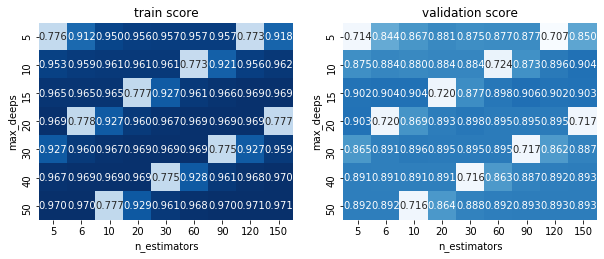

In [15]:
train_scores_df = pd.DataFrame(data=np.array(train_score).reshape(len(max_deeps), -1),
                             index=max_deeps, columns= n_estimators)
val_scores_df = pd.DataFrame(data=np.array(val_score).reshape(len(max_deeps), -1), 
                           index= max_deeps, columns= n_estimators)
min_score = min(min(train_score), min(val_score))
max_score = max(max(train_score), max(val_score))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_scores_df, vmin=min_score, vmax=max_score, square=True, annot=True, 
cbar=False, fmt='.3f', cmap='Blues')
plt.title('train score'); plt.ylabel('max_deeps'); plt.xlabel('n_estimators')
plt.subplot(1, 2, 2)
sns.heatmap(val_scores_df, vmin=min_score, vmax=max_score, square=True, annot=True, 
cbar=False, fmt='.3f', cmap='Blues')
plt.title('validation score'); plt.ylabel('max_deeps'); plt.xlabel('n_estimators');

# knn

In [16]:
knn = KNeighborsRegressor(n_neighbors=5, n_jobs=4)
full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('knn', knn)])

n_neighbors = [5, 6, 10, 20, 30, 60, 90, 120, 150]
train_score = []
val_score = []
for n_neighbor in n_neighbors:
    full_pipeline.set_params(knn__n_neighbors=n_neighbor)
    full_pipeline.fit(train_X_df, train_y_sr)
    train_score.append(full_pipeline.score(train_X_df, train_y_sr))
    val_score.append(full_pipeline.score(val_X_df, val_y_sr))
    print('n_neighbor: %d - Train score: %f - Val score: %f' %(n_neighbor, full_pipeline.score(train_X_df, train_y_sr), full_pipeline.score(val_X_df, val_y_sr)))

n_neighbor: 5 - Train score: 0.895362 - Val score: 0.848028
n_neighbor: 6 - Train score: 0.881552 - Val score: 0.858677
n_neighbor: 10 - Train score: 0.850824 - Val score: 0.843894
n_neighbor: 20 - Train score: 0.761486 - Val score: 0.775987
n_neighbor: 30 - Train score: 0.683434 - Val score: 0.662795
n_neighbor: 60 - Train score: 0.509313 - Val score: 0.464460
n_neighbor: 90 - Train score: 0.409121 - Val score: 0.394658
n_neighbor: 120 - Train score: 0.358042 - Val score: 0.347360
n_neighbor: 150 - Train score: 0.318218 - Val score: 0.316078


# Lasso

In [17]:
lasso = Lasso(alpha=1.0, random_state=0, max_iter=3000)
full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('lasso', lasso)])

alphas = [0.1, 0.3, 0.5, 1, 2, 5]
train_score = []
val_score = []
for alpha_ in alphas:
    full_pipeline.set_params(lasso__alpha=alpha_)
    full_pipeline.fit(train_X_df, train_y_sr)
    train_score.append(full_pipeline.score(train_X_df, train_y_sr))
    val_score.append(full_pipeline.score(val_X_df, val_y_sr))
    print('alpha: %f - Train score: %f - Val score: %f' %(alpha_, full_pipeline.score(train_X_df, train_y_sr), full_pipeline.score(val_X_df, val_y_sr)))

alpha: 0.100000 - Train score: 0.925895 - Val score: 0.857443
alpha: 0.300000 - Train score: 0.925791 - Val score: 0.857716
alpha: 0.500000 - Train score: 0.925619 - Val score: 0.857930
alpha: 1.000000 - Train score: 0.925021 - Val score: 0.857733
alpha: 2.000000 - Train score: 0.923470 - Val score: 0.858686
alpha: 5.000000 - Train score: 0.917772 - Val score: 0.859472


# Ridge

In [18]:
ridge = Ridge(alpha=1.0, random_state=0, max_iter=3000)
full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('ridge', ridge)])

alphas = [0.1, 0.3, 0.5, 1, 2, 5]
train_score = []
val_score = []
for alpha_ in alphas:
    full_pipeline.set_params(ridge__alpha=alpha_)
    full_pipeline.fit(train_X_df, train_y_sr)
    train_score.append(full_pipeline.score(train_X_df, train_y_sr))
    val_score.append(full_pipeline.score(val_X_df, val_y_sr))
    print('alpha: %f - Train score: %f - Val score: %f' %(alpha_, full_pipeline.score(train_X_df, train_y_sr), full_pipeline.score(val_X_df, val_y_sr)))

alpha: 0.100000 - Train score: 0.925902 - Val score: 0.855150
alpha: 0.300000 - Train score: 0.925905 - Val score: 0.855068
alpha: 0.500000 - Train score: 0.925894 - Val score: 0.855056
alpha: 1.000000 - Train score: 0.925897 - Val score: 0.855323
alpha: 2.000000 - Train score: 0.925872 - Val score: 0.855310
alpha: 5.000000 - Train score: 0.925786 - Val score: 0.855624


# Linear

In [19]:
linear = LinearRegression()
full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('linear', linear)])

full_pipeline.set_params()
full_pipeline.fit(train_X_df, train_y_sr)
train_score.append(full_pipeline.score(train_X_df, train_y_sr))
val_score.append(full_pipeline.score(val_X_df, val_y_sr))
print('Train score: %f - Val score: %f' %(full_pipeline.score(train_X_df, train_y_sr), full_pipeline.score(val_X_df, val_y_sr)))

Train score: 0.925911 - Val score: 0.855057


In [20]:
# train_scores_df = pd.DataFrame(data=np.array(train_score).reshape(len(alphas), -1),
#                              index=alphas, columns= max_iters)
# val_scores_df = pd.DataFrame(data=np.array(val_score).reshape(len(alphas), -1), 
#                            index= alphas, columns= max_iters)
# min_score = min(min(train_score), min(val_score))
# max_score = max(max(train_score), max(val_score))
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# sns.heatmap(train_scores_df, vmin=min_score, vmax=max_score, square=True, annot=True, 
#             cbar=False, fmt='.3f', cmap='Blues')
# plt.title('train score'); plt.ylabel('alpha'); plt.xlabel('max_iter')
# plt.subplot(1, 2, 2)
# sns.heatmap(val_scores_df, vmin=min_score, vmax=max_score, square=True, annot=True, 
#             cbar=False, fmt='.3f', cmap='Blues')
# plt.title('validation score'); plt.ylabel('alpha'); plt.xlabel('max_iter');

# ElasticNet

In [21]:
elastic_net = ElasticNet(alpha=1.0, random_state=0, max_iter=2000)
full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('elastic_net', elastic_net)])

alphas = [0.01, 0.1, 0.2, 0.3, 0.5, 1]
train_score = []
val_score = []
for alpha_ in alphas:
    full_pipeline.set_params(elastic_net__alpha=alpha_)
    full_pipeline.fit(train_X_df, train_y_sr)
    train_score.append(full_pipeline.score(train_X_df, train_y_sr))
    val_score.append(full_pipeline.score(val_X_df, val_y_sr))
    print('alpha: %f - Train score: %f - Val score: %f' %(alpha_, full_pipeline.score(train_X_df, train_y_sr), full_pipeline.score(val_X_df, val_y_sr)))

alpha: 0.010000 - Train score: 0.925849 - Val score: 0.855885
alpha: 0.100000 - Train score: 0.923634 - Val score: 0.858907
alpha: 0.200000 - Train score: 0.920305 - Val score: 0.860053
alpha: 0.300000 - Train score: 0.916619 - Val score: 0.859923
alpha: 0.500000 - Train score: 0.908603 - Val score: 0.857283
alpha: 1.000000 - Train score: 0.886861 - Val score: 0.843745


# GradientBoosting

In [22]:
gradient_boosting = GradientBoostingRegressor(learning_rate=0.1, verbose=0, random_state=0)
full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('gradient_boosting', gradient_boosting)])

learning_rates = [0.001, 0.01, 0.1, 0.3, 0.5, 1]
train_score = []
val_score = []
for learning_rate in learning_rates:
    full_pipeline.set_params(gradient_boosting__learning_rate=learning_rate)
    full_pipeline.fit(train_X_df, train_y_sr)
    train_score.append(full_pipeline.score(train_X_df, train_y_sr))
    val_score.append(full_pipeline.score(val_X_df, val_y_sr))
    print('learning_rate: %f - Train score: %f - Val score: %f' %(learning_rate, full_pipeline.score(train_X_df, train_y_sr), full_pipeline.score(val_X_df, val_y_sr)))

learning_rate: 0.001000 - Train score: 0.109029 - Val score: 0.105619
learning_rate: 0.010000 - Train score: 0.559588 - Val score: 0.536819
learning_rate: 0.100000 - Train score: 0.899102 - Val score: 0.867072
learning_rate: 0.300000 - Train score: 0.955065 - Val score: 0.894783
learning_rate: 0.500000 - Train score: 0.966873 - Val score: 0.870318
learning_rate: 1.000000 - Train score: 0.981505 - Val score: 0.846633


# Models

In [23]:
models = [KNeighborsRegressor(),
          LinearRegression(),
          Lasso(),
          Ridge(),
          ElasticNet(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          DecisionTreeRegressor(random_state=0)]

models_names = ['K-nn', 'Linear','Lasso','Ridge','Elastic','Boost','Forest', 'DecisionTree']

In [24]:
scores = []
mse = []
mae = []

for model in models:
    full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('model', model)])
    fits = full_pipeline.fit(train_X_df, train_y_sr)
    scores.append(metrics.r2_score(val_y_sr, fits.predict(val_X_df)))
    mse.append(metrics.mean_squared_error(val_y_sr, fits.predict(val_X_df)))
    mae.append(metrics.median_absolute_error(val_y_sr, fits.predict(val_X_df)))
    
print(scores)
print(mse)
print(mae)

[0.8480280921445995, 0.8550567935578921, 0.8577330293290784, 0.8553230009451097, 0.8437451248199466, 0.866328128135293, 0.8882891091483194, 0.8600335524759841]
[79829.18666226088, 76137.08642457149, 74731.28894564844, 75997.25058579733, 82078.98271241905, 70216.37723160497, 58680.51328599123, 73522.8492128925]
[125.89999999999998, 145.61536165164944, 150.7253464214636, 146.74133835983906, 157.2125645493574, 133.42364557470512, 97.88686666666644, 100.0]


# Visualize result 

Text(0, 0.5, 'Median absolute error')

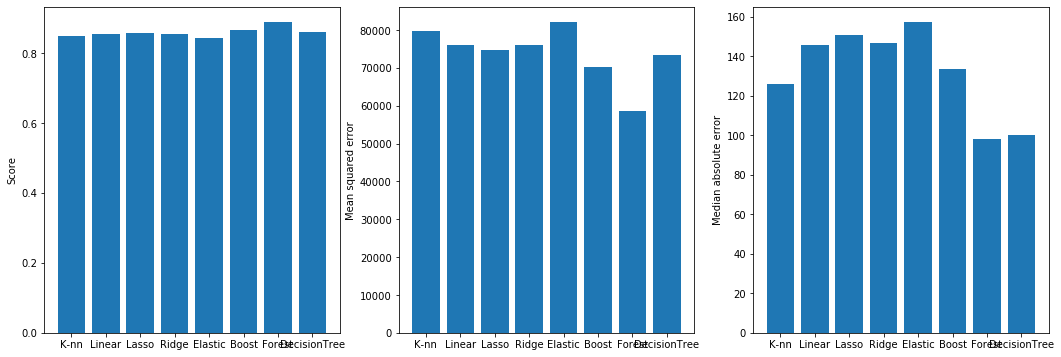

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, sharey=False, figsize=(18,6))
ax1.bar(models_names, scores)
ax1.set_ylabel('Score')
ax2.bar(models_names, mse)
ax2.set_ylabel('Mean squared error')
ax3.bar(models_names, mae)
ax3.set_ylabel('Median absolute error')

In [26]:
random_forest = RandomForestRegressor(verbose=0, n_jobs=4, random_state=0)
full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('random_forest', random_forest)])

n_estimators = [5, 6, 10, 20, 30, 60, 90, 120, 150]
train_acc = []
val_acc = []
for n_es_ in n_estimators:
    full_pipeline.set_params(random_forest__n_estimators=n_es_)
    full_pipeline.fit(train_X_df, train_y_sr)
    train_acc.append(full_pipeline.score(train_X_df, train_y_sr))
    val_acc.append(full_pipeline.score(val_X_df, val_y_sr))
    print('n_estimator: %d - Train acc: %f - Val acc: %f' %(n_es_, full_pipeline.score(train_X_df, train_y_sr), full_pipeline.score(val_X_df, val_y_sr)))

n_estimator: 5 - Train acc: 0.956864 - Val acc: 0.877491
n_estimator: 6 - Train acc: 0.960697 - Val acc: 0.883914
n_estimator: 10 - Train acc: 0.964704 - Val acc: 0.903663
n_estimator: 20 - Train acc: 0.969139 - Val acc: 0.903469
n_estimator: 30 - Train acc: 0.969074 - Val acc: 0.895271
n_estimator: 60 - Train acc: 0.969113 - Val acc: 0.895365
n_estimator: 90 - Train acc: 0.969126 - Val acc: 0.891228
n_estimator: 120 - Train acc: 0.970069 - Val acc: 0.891964
n_estimator: 150 - Train acc: 0.970574 - Val acc: 0.892783


Text(0.5, 0, 'n Estimators')

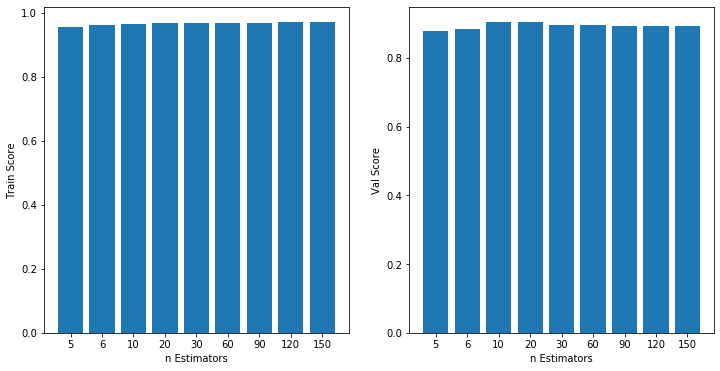

In [27]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=False, figsize=(12,6))
n_estimators_labs = ['5', '6', '10', '20', '30', '60', '90', '120', '150']
ax1.bar(n_estimators_labs, train_acc)
ax1.set_ylabel('Train Score')
ax1.set_xlabel('n Estimators')
ax2.bar(n_estimators_labs, val_acc)
ax2.set_ylabel('Val Score')
ax2.set_xlabel('n Estimators')

# Test

In [28]:
test_data_df = pd.read_csv('bestbuy_test_data_predict_price.csv', index_col=False)

In [29]:
test_y_sr = test_data_df['Price']
test_X_df = test_data_df.drop('Price', axis=1)

In [30]:
test_model = RandomForestRegressor(n_estimators=10, n_jobs=4, max_depth=15) # 10, 15
full_pipeline = Pipeline([('reprocess_data', reprocess_pipeline), ('test_model', test_model)])

fits = full_pipeline.fit(train_X_df, train_y_sr)
fits.score(test_X_df, test_y_sr)

0.8351232996495593

In [31]:
predicted = pd.DataFrame.from_dict({'predicted':fits.predict(test_X_df), 'true':test_y_sr})
predicted['Difference'] = predicted.predicted - predicted.true
predicted.sample(n=10).round(2)

,predicted,true,Difference
34,1219.14,1299.99,-80.85
71,1471.95,2599.99,-1128.04
67,1422.79,1089.99,332.80
101,320.77,363.99,-43.22
83,3148.69,3099.99,48.70
80,339.80,322.99,16.81
100,750.70,999.99,-249.29
63,1159.07,1269.99,-110.92
90,565.68,349.99,215.69
97,238.82,293.99,-55.17
